# Data Preprocessing Notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gather

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
'''
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')
'''
patients = pd.read_csv('/content/drive/MyDrive/Data Preproc Dataset/patients.csv')
treatments = pd.read_csv('/content/drive/MyDrive/Data Preproc Dataset/treatments.csv')
adverse_reactions = pd.read_csv('/content/drive/MyDrive/Data Preproc Dataset/adverse_reactions.csv')


## Assess

###Patient dataset

In [5]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [6]:
list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [7]:
# Checking for records containing missing addresses
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [8]:
patients.surname.value_counts()

Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 466, dtype: int64

In [9]:
patients.address.value_counts()

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

In [10]:
# Checking for patient with duplicated addresses
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [11]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

**Run the previous cell, Did you notice something ?**

In [12]:
patients.iloc[210,3]

'Zaitseva'

In [13]:
patients[patients.surname == 'Zaitseva']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1


In [14]:
patients[patients.surname == 'Zaitseva']['weight']

210    48.8
Name: weight, dtype: float64

In [15]:
# Using the BMI checking whether the erroneous weight is entered in kg
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [16]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

###Adverse Reactions dataset

In [18]:
adverse_reactions.sample(5)

,given_name,surname,adverse_reaction
20,anenechi,chidi,hypoglycemia
19,finley,chandler,headache
27,idalia,moore,hypoglycemia
3,flavia,fiorentino,cough
2,joseph,day,hypoglycemia


In [20]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [21]:
adverse_reactions.describe()

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,berta,johnson,hypoglycemia
freq,1,2,19


###Treatments dataset

In [22]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
20,mile,stanić,-,47u - 48u,7.66,7.24,0.92
209,kári,hervinsson,37u - 43u,-,8.09,7.66,NaN
145,ruman,bisliev,46u - 53u,-,7.72,7.39,0.33
55,triana.,terrazas,34u - 42u,-,7.71,7.34,0.37
212,alexander,hueber,35u - 38u,-,7.71,7.35,0.36


In [23]:
sum(treatments.auralin.isnull())

0

In [24]:
sum(treatments.novodra.isnull())

0

In [25]:
# Checking the duplicated columns
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

### Scatterplot

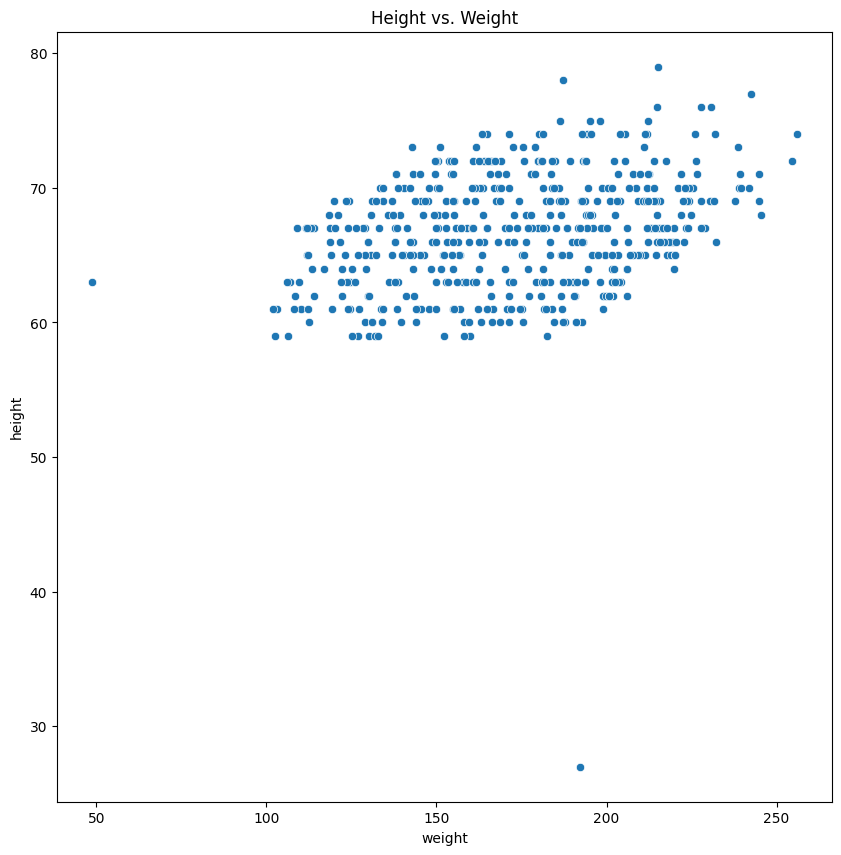

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = patients, x ='weight', y = 'height')
plt.title('Height vs. Weight');

### Boxplot

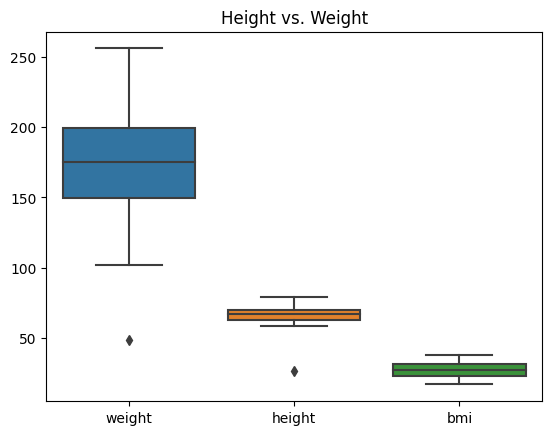

In [27]:
sns.boxplot(data = patients.drop(['patient_id', 'zip_code'], axis = 1))
plt.title('Height vs. Weight');

### Z-Score

In [28]:
patients[['weight', 'height', 'bmi']].mean()

weight    173.434990
height     66.634195
bmi        27.483897
dtype: float64

In [29]:
z_df = patients[['weight', 'height', 'bmi']]
from scipy import stats
z = stats.zscore(z_df)
#z = np.abs(stats.zscore(z_df))
print(z)

       weight    height       bmi
0   -1.526871 -0.143909 -1.495658
1   -1.612460 -0.143909 -1.571542
2    0.128826  0.990673 -0.509163
3    1.400850  0.763756  0.799839
4    0.556769 -8.993647 -0.262540
..        ...       ...       ...
498  0.226220  1.217589 -0.547105
499  1.952749  0.763756  1.312057
500 -0.065962  0.083007 -0.129742
501  0.102264  0.083007  0.040997
502 -1.039901  0.990673 -1.552571

[503 rows x 3 columns]


<Figure size 1200x600 with 0 Axes>

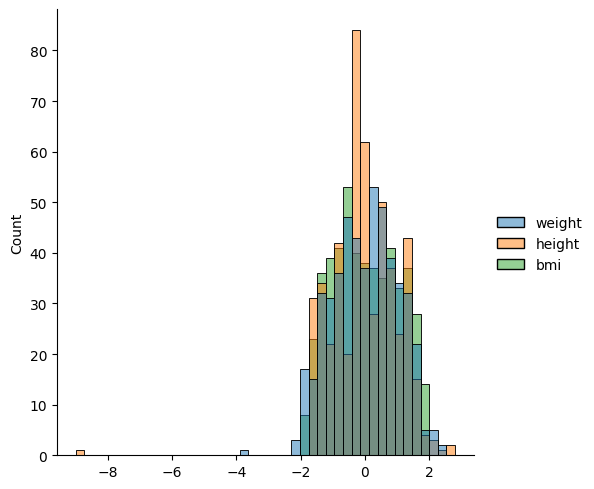

In [30]:
plt.figure(figsize=(12, 6))
sns.displot(z)

In [31]:
threshold = 3
print(np.where( z > 3 ))

(array([], dtype=int64), array([], dtype=int64))


In [32]:
print(z['weight'][210])
print(z['height'][4])

-3.6783918972867085
-8.9936467900375


#### Quality
##### `patients` table
- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) ***(can't clean yet)***
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

##### `treatments` table
- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

##### `adverse_reactions` table
- Lowercase given names and surnames

#### Tidiness
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

## Clean

In [33]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

### Missing Data

#### `treatments`: Missing records (280 instead of 350)

##### Define
- Importing the cut treatments into a DataFrame and concatenate it with the original treatments DataFrame.

##### Code

In [34]:
treatments_cut = pd.read_csv('/content/drive/MyDrive/Data Preproc Dataset/treatments_cut.csv')
#treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean, treatments_cut],
                             ignore_index=True)

##### Test

In [35]:
treatments_clean

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN


In [36]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


#### `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)

##### Define
- Recalculating the `hba1c_change` column: `hba1c_start` minus `hba1c_end`.

##### Code

In [37]:
treatments_clean.hba1c_change = (treatments_clean.hba1c_start -
                                 treatments_clean.hba1c_end)

##### Test

In [38]:
treatments_clean.hba1c_change.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

### Tidiness

#### Contact column in `patients` table contains two variables: phone number and email

##### Define
- Extracting the *phone number* and *email* variables from the *contact* column using regular expressions and pandas' `str.extract` method.
- Drop the *contact* column when done.

##### Code

In [39]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})'
, expand=True) # expanding the extracted value to another column otherwise the return will be an array on the same column

patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.][a-zA-Z]+)', expand=True)
# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)

##### Test

In [40]:
# Confirm contact column is gone
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [41]:
patients_clean.phone_number.sample(25)

275    +1 (224) 305-6805
73          978-969-6753
129         631-370-7406
226         914-784-6646
249                  NaN
132         570-698-4203
409         716-897-5050
180         318-417-5739
156    +1 (612) 208-2965
88          706-755-5723
267    +1 (785) 823-6728
452         717-368-8321
427         325-513-8964
94          305-361-8416
351         423-799-1730
297         724-759-0310
344         404-713-3641
122         231-607-3625
23          813 355 9476
6           775-533-5933
153         775 770 7827
127         360-482-2553
110    +1 (214) 637-0855
463         573 437 7334
322         254-546-2728
Name: phone_number, dtype: object

In [42]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

#### Three variables in two columns in `treatments` table (treatment, start dose and end dose)

##### Define
- Melting the *auralin* and *novodra* columns to a *treatment* and a *dose* column (dose will still contain both start and end dose at this point).
- Splitting the dose column on ' - ' to obtain *start_dose* and *end_dose* columns.
- Dropping the intermediate *dose* column.

##### Code

In [43]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [44]:
treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-
...,...,...,...,...,...,...,...
695,rovzan,kishiev,7.75,7.41,0.34,novodra,-
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u
697,bernd,schneider,7.74,7.44,0.30,novodra,-
698,berta,napolitani,7.68,7.21,0.47,novodra,42u - 44u


In [45]:
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
treatments_clean = treatments_clean.drop('dose', axis=1)

<ipython-input-45-0a38d31a61e0>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
<ipython-input-45-0a38d31a61e0>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
<ipython-input-45-0a38d31a61e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
<ipython-input-45-0a38d31a61e0>:2: Setting

##### Test

In [46]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


#### Adverse reaction should be part of the `treatments` table

##### Define
- Merging the *adverse_reaction* column to the `treatments` table, joining on *given name* and *surname*.

##### Code

In [47]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='left')

##### Test

In [48]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

##### Define
Adverse reactions table is no longer needed so we will ignore that part.

- Isolating the patient ID and names in the `patients` table, then converting these names to lower case to join with `treatments`.
- Dropping the given name and surname columns in the treatments table (so these being lowercase isn't an issue anymore).

##### Code

In [49]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

<ipython-input-49-19acb9598c4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.given_name = id_names.given_name.str.lower()
<ipython-input-49-19acb9598c4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.surname = id_names.surname.str.lower()


##### Test

In [50]:
# Confirm the merge was executed correctly
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55u,51u,nausea,153
345,7.67,7.30,0.37,novodra,26u,23u,NaN,420
346,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia,25


In [51]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

### Quality

#### Zip code is a float not a string and Zip code has four digits sometimes

In [52]:
patients_clean.zip_code

0      92390.0
1      61812.0
2      68467.0
3       7095.0
4      36303.0
        ...   
498     3852.0
499    86341.0
500    64110.0
501    98109.0
502    68324.0
Name: zip_code, Length: 503, dtype: float64

##### Define
- Converting the zip code column's data type from a float to a string using `astype`.
- Removing the '.0' using string slicing
- Padding four digit zip codes with a leading 0.

##### Code

In [53]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')
patients_clean.zip_code

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 503, dtype: object

In [54]:
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

##### Test

In [55]:
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

#### Tim Neudorf height is 27 in instead of 72 in

##### Define
- Replacing height for rows in the `patients` table that have a height of 27 in (there is only one) with 72 in.

##### Code

In [56]:
patients_clean.height = patients_clean.height.replace(27, 72)

##### Test

In [57]:
# Should be empty
patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [58]:
# Confirm the replacement worked
patients_clean[patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


#### Full state names sometimes, abbreviations other times

In [59]:
patients_clean.state.value_counts()

California    36
TX            32
New York      25
CA            24
NY            22
MA            22
PA            18
GA            15
Illinois      14
OH            14
OK            13
MI            13
Florida       13
LA            13
NJ            12
VA            11
MS            10
WI            10
IL            10
IN             9
MN             9
FL             9
AL             9
TN             9
WA             8
NC             8
KY             8
MO             7
ID             6
NV             6
KS             6
SC             5
IA             5
CT             5
ME             4
RI             4
Nebraska       4
ND             4
CO             4
AZ             4
AR             4
MD             3
DE             3
WV             3
SD             3
OR             3
NE             2
MT             2
VT             2
DC             2
AK             1
WY             1
NH             1
NM             1
Name: state, dtype: int64

##### Define
- Applying a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

##### Code

In [60]:
# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']

patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

##### Test

In [61]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

#### Dsvid Gustafsson

##### Define
Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'.

##### Code

In [62]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')

##### Test

In [63]:
patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


#### Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra

##### Define
- Converting assigned sex and state to categorical data types. Zip code data type was already addressed above.
- Convert birthdate to datetime data type.
- Strip the letter 'u' in start dose and end dose and convert those columns to data type integer.

##### Code

In [64]:
# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

##### Test

In [65]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [66]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       349 non-null    float64
 1   hba1c_end         349 non-null    float64
 2   hba1c_change      349 non-null    float64
 3   treatment         349 non-null    object 
 4   dose_start        349 non-null    int64  
 5   dose_end          349 non-null    int64  
 6   adverse_reaction  35 non-null     object 
 7   patient_id        349 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.5+ KB


In [67]:
treatments_clean.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15


#### Multiple phone number formats

##### Define
Strip all " ", "-", "(", ")", and "+" and store each number without any formatting. Pad the phone number with a 1 if the length of the number is 10 digits (we want country code).

##### Code

In [68]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

<ipython-input-68-e22f6ea80612>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')


##### Test

In [69]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

#### Default John Doe data

In [70]:
patients_clean[patients_clean.surname == 'Doe']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
215,216,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
229,230,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
237,238,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
244,245,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
251,252,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com
277,278,male,John,Doe,123 Main Street,New York,NY,12345,United States,1975-01-01,180.0,72,24.4,11234567890,johndoe@email.com


##### Define
- Removing the non-recoverable John Doe records from the `patients` table.

##### Code

In [71]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

##### Test

In [72]:
# Should be no Doe records
patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 465, dtype: int64

In [73]:
# Should be no 123 Main Street records
patients_clean.address.value_counts()

2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
576 Brown Bear Drive        1
2272 Williams Avenue        1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 482, dtype: int64

#### Multiple records for Jakobsen, Gersten, Taylor

##### Define
- Removing the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the `patients` table. These are the nicknames, which happen to also not be in the `treatments` table (removing the wrong name would create a consistency issue between the `patients` and `treatments` table). These are all the second occurrence of the duplicate. These are also the only occurences of non-null duplicate addresses.

##### Code

In [74]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

##### Test

In [75]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [76]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [77]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### Kgs instead of lbs for Zaitseva weight

##### Define
- Using [advanced indexing](https://stackoverflow.com/a/44913631) to isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs.

##### Code

In [78]:
weight_kg = patients_clean.weight.min()
column_name = 'weight'
patients_clean.loc[patients_clean.surname == 'Zaitseva', column_name] = weight_kg * 2.20462

##### Test

In [79]:
# 48.8 shouldn't be the lowest anymore
patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

In [80]:
patients_clean

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,1976-07-10,121.7,66,19.6,19517199170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,1967-04-03,118.8,66,19.2,12175693204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,1980-02-19,177.8,71,24.8,14023636804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,1951-07-26,220.9,70,31.7,17326368246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,1928-02-18,192.3,72,26.1,13345157487,TimNeudorf@cuvox.de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,male,Masataka,Murakami,1179 Patton Lane,Tulsa,OK,74116,United States,1937-08-19,155.1,72,21.0,19189849171,MasatakaMurakami@einrot.com
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,03852,United States,1959-04-10,181.1,72,24.6,12074770579,MustafaLindstrom@jourrapide.com
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,1948-03-26,239.6,70,34.4,19282844492,RumanBisliev@gustr.com
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,1971-01-13,171.2,67,26.8,18162236007,JinkedeKeizer@teleworm.us


In [81]:
treatments_clean

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41,48,NaN,225
1,7.97,7.62,0.35,auralin,33,36,NaN,242
2,7.65,7.27,0.38,auralin,37,42,NaN,345
3,7.89,7.55,0.34,auralin,31,38,NaN,276
4,7.76,7.37,0.39,auralin,30,36,NaN,15
...,...,...,...,...,...,...,...,...
344,7.51,7.06,0.45,novodra,55,51,nausea,153
345,7.67,7.30,0.37,novodra,26,23,NaN,420
346,9.21,8.80,0.41,novodra,22,23,injection site discomfort,336
347,7.96,7.51,0.45,novodra,28,26,hypoglycemia,25


## ***ML Approaches to Consider***

Classification:

- Adverse Reaction Classification: Classify patients into groups based on the likelihood of experiencing adverse reactions to treatments.

Clustering:

- Patient Segmentation: Use clustering algorithms to identify groups of patients with similar health profiles.

Regression:

- HbA1c Change Regression: Predict the change in HbA1c levels based on treatment and other patient attributes.

In [82]:
#Merging the datasets for feature
model_df = pd.merge(treatments_clean, patients_clean, on='patient_id', how='inner')

In [83]:
model_df.columns

Index(['hba1c_start', 'hba1c_end', 'hba1c_change', 'treatment', 'dose_start',
       'dose_end', 'adverse_reaction', 'patient_id', 'assigned_sex',
       'given_name', 'surname', 'address', 'city', 'state', 'zip_code',
       'country', 'birthdate', 'weight', 'height', 'bmi', 'phone_number',
       'email'],
      dtype='object')

## Transforming Data

### Checking for categorical and numerical columns

In [84]:
model_df.dtypes

hba1c_start                float64
hba1c_end                  float64
hba1c_change               float64
treatment                   object
dose_start                   int64
dose_end                     int64
adverse_reaction            object
patient_id                   int64
assigned_sex              category
given_name                  object
surname                     object
address                     object
city                        object
state                     category
zip_code                    object
country                     object
birthdate           datetime64[ns]
weight                     float64
height                       int64
bmi                        float64
phone_number                object
email                       object
dtype: object

In [85]:
X = model_df.drop(['hba1c_start', 'hba1c_end', 'adverse_reaction', 'patient_id', 'weight', 'height',
                   'phone_number', 'zip_code', 'email', 'address', 'state', 'city', 'given_name', 'surname', 'country'], axis = 1)
y = model_df[['adverse_reaction']]

###

##### Define
- Encoding categorical columns such as `assigned_sex`, `treatment`, `adverse_reaction`

#### Code

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [87]:
# Creating an instance
label_encoder = LabelEncoder()

# Encoding the hba1c_change column
y = pd.Series(label_encoder.fit_transform(y))
y.name = 'Encoded Target'
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0      6
1      6
2      6
3      6
4      6
      ..
344    4
345    6
346    3
347    2
348    3
Name: Encoded Target, Length: 349, dtype: int64

In [88]:
# Creating an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output= False)
#sparse True --> Matrix, otherwise Array

# Encoding the treatment column
treatment_encoded = onehot_encoder.fit_transform(X[['treatment']])

treatment_encoded.shape

(349, 2)

In [89]:
# Creating a DataFrame from the encoded values
treatment_encoded_df = pd.DataFrame(treatment_encoded, columns=onehot_encoder.get_feature_names_out(['treatment']))

# Concatenate the encoded DataFrame with the original treatments_clean DataFrame
X = pd.concat([X, treatment_encoded_df], axis=1)

X.drop(['treatment'], inplace = True, axis=1)

In [90]:
# We can also apply one-hot encoding using get_dummies

#treatments_encoded_dummies = pd.get_dummies(treatments_clean, columns=['treatment'], prefix=['treatment'])

#treatments_encoded_dummies.head()

In [91]:
X['assigned_sex'] = X['assigned_sex'].map({'female' : 0, 'male':1})

In [92]:
X

,hba1c_change,dose_start,dose_end,assigned_sex,birthdate,bmi,treatment_auralin,treatment_novodra
0,0.43,41,48,0,1981-01-15,31.3,1.0,0.0
1,0.35,33,36,0,1934-01-20,27.3,1.0,0.0
2,0.38,37,42,0,1939-06-04,32.1,1.0,0.0
3,0.34,31,38,1,1982-07-17,23.4,1.0,0.0
4,0.39,30,36,0,1997-08-15,18.6,1.0,0.0
...,...,...,...,...,...,...,...,...
344,0.45,55,51,1,1984-09-04,34.2,0.0,1.0
345,0.37,26,23,0,1969-10-20,22.3,0.0,1.0
346,0.41,22,23,0,1925-03-29,20.7,0.0,1.0
347,0.45,28,26,1,1985-08-01,24.4,0.0,1.0


####Test

In [93]:
X.head()

,hba1c_change,dose_start,dose_end,assigned_sex,birthdate,bmi,treatment_auralin,treatment_novodra
0,0.43,41,48,0,1981-01-15,31.3,1.0,0.0
1,0.35,33,36,0,1934-01-20,27.3,1.0,0.0
2,0.38,37,42,0,1939-06-04,32.1,1.0,0.0
3,0.34,31,38,1,1982-07-17,23.4,1.0,0.0
4,0.39,30,36,0,1997-08-15,18.6,1.0,0.0


In [94]:
y

0      6
1      6
2      6
3      6
4      6
      ..
344    4
345    6
346    3
347    2
348    3
Name: Encoded Target, Length: 349, dtype: int64

In [95]:
# We can also apply one-hot encoding using get_dummies

#treatments_encoded_dummies = pd.get_dummies(treatments_clean, columns=['treatment'], prefix=['treatment'])

#treatments_encoded_dummies.head()

#### Define
- Scaling features is essential for our model to perform optimally, converge efficiently, and provide meaningful interpretations of feature contributions.

<Axes: >

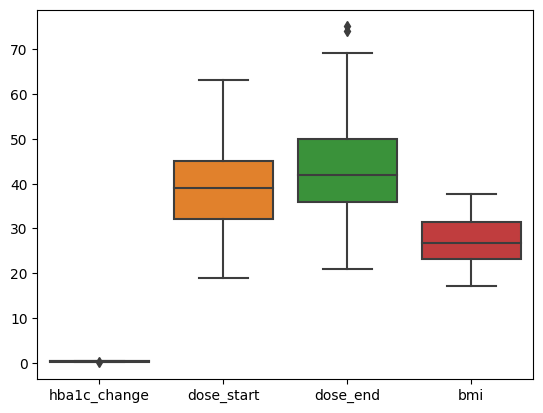

In [96]:
sns.boxplot(X.drop(['treatment_auralin', 'treatment_novodra'], axis = 1))

In [97]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Applying Normalization using the MinMaxScaler
minmax_scaler = MinMaxScaler()
X[['dose_start', 'dose_end',
   'hba1c_change', 'bmi']] = minmax_scaler.fit_transform(X[['dose_start', 'dose_end', 'hba1c_change', 'bmi']])

#### Test

<Axes: >

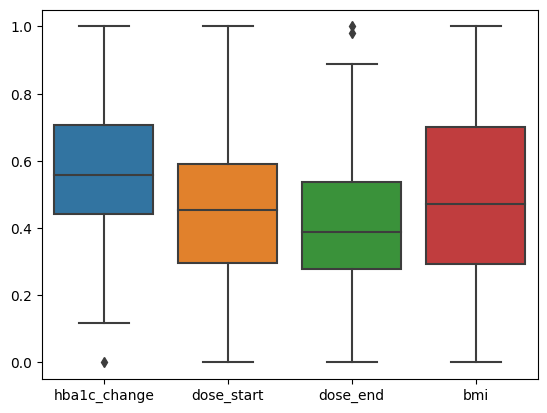

In [98]:
sns.boxplot(X.drop(['treatment_auralin', 'treatment_novodra'], axis = 1))